In [1]:
import sqlite3
from sqlite3 import Error
import pandas as pd
import matplotlib.pyplot as plt

con = sqlite3.connect('equipo.db')
cursorObj = con.cursor()

#Creo la Conexión con la base de Datos
def sql_connection():
    try:
        con = sqlite3.connect(':memory:')
        print("Connection is established: Database is created in memory")

    except Error:
        print(Error)

    finally:
        con.close()
sql_connection()

Connection is established: Database is created in memory


In [2]:
#Función para Crear Tabla --> Crear/Create
def crear_tabla(con):
    cursorObj = con.cursor()
    cursorObj.execute("CREATE TABLE JUGADORES(ID INTEGER PRIMARY KEY, NOMBRE TEXT, EDAD INTEGER, SUELDO INTEGER, PARTIDOS INTEGER)")
    con.commit()
crear_tabla(con)

In [11]:
#Función Para Insertar Registros en la Tabla --> Insertar
def insertar_registros(con):
    cursorObj = con.cursor()
    cursorObj.execute("INSERT INTO JUGADORES VALUES(1, 'Andrés', 35, 2000, 30)")
    cursorObj.execute("INSERT INTO JUGADORES VALUES(2, 'Fernando', 30, 5000, 10)")
    cursorObj.execute("INSERT INTO JUGADORES VALUES(3, 'David', 24, 10000, 20)")
    cursorObj.execute("INSERT INTO JUGADORES VALUES(4, 'Daniel', 28, 2500, 15)")
    cursorObj.execute("INSERT INTO JUGADORES VALUES(5, 'Carles', 32, 500, 25)")
    con.commit()
insertar_registros(con)

IntegrityError: UNIQUE constraint failed: JUGADORES.ID

In [4]:
#Función para actualizar los registros de la tabla --> Actualizar/Update
def actualizar_tabla(con):
    cursorObj = con.cursor()
    cursorObj.execute('UPDATE jugadores SET NOMBRE = "Pepe" where id = 3')
    con.commit()
actualizar_tabla(con)

In [5]:
#Mostrar resultados de la Base de Datos --> Leer/Read
def mostrar_resultado(con):
    cursorObj = con.cursor()
    cursorObj.execute('SELECT * FROM jugadores')
    rows = cursorObj.fetchall()
    for row in rows:
        print(row)
mostrar_resultado(con)

(1, 'Andrés', 35, 2000, 30)
(2, 'Fernando', 30, 5000, 10)
(3, 'Pepe', 24, 10000, 20)
(4, 'Daniel', 28, 2500, 15)
(5, 'Carles', 32, 500, 25)


In [6]:
#Eliminar Registros de la Base de Datos --> Eliminar/Delete
def eliminar_registro(con):
    cursorObj = con.cursor()
    cursorObj.execute('DELETE FROM jugadores WHERE ID = 5')
    con.commit()
eliminar_registro(con)

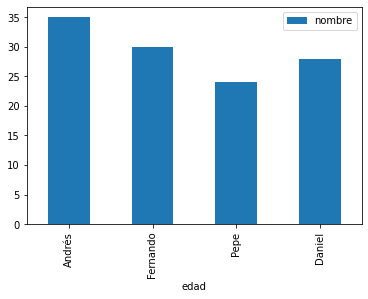

In [7]:
def mostrar_grafica1(con):
    cursorObj = con.cursor()
    resultado1 = cursorObj.execute('SELECT EDAD, NOMBRE FROM jugadores')
    resultado = resultado1.fetchall()
    df = pd.DataFrame(resultado, columns=['nombre', 'edad'])
    df.plot(kind='bar', x='edad')
    plt.show()
mostrar_grafica1(con)

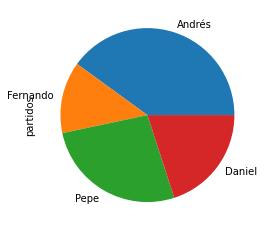

In [8]:
def mostrar_grafica2(con):
    cursorObj = con.cursor()
    resultado1 = cursorObj.execute('SELECT NOMBRE, PARTIDOS FROM jugadores')
    resultado = resultado1.fetchall()
    df = pd.DataFrame(resultado, columns=['nombre', 'partidos'])
    df.plot(kind='pie', y='partidos', labels=df['nombre'], legend=False, fontsize=10)
    plt.show()
mostrar_grafica2(con)